<a href="https://colab.research.google.com/github/sameersahu473/Time_series/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
dt = pd.read_csv('/content/drive/My Drive/kaggle/AirQuality.csv',delimiter=';')

In [4]:
dt.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [5]:
cols = ['Date','Time','CO(GT)','T']
data = dt[cols]

In [6]:
data.head()

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,"2,6","13,6"
1,10/03/2004,19.00.00,2,"13,3"
2,10/03/2004,20.00.00,"2,2","11,9"
3,10/03/2004,21.00.00,"2,2","11,0"
4,10/03/2004,22.00.00,"1,6","11,2"


In [7]:
for col in data.columns:  
    dataTypeSeries = data[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of Date column of Dataframe :
object
Data type of Time column of Dataframe :
object
Data type of CO(GT) column of Dataframe :
object
Data type of T column of Dataframe :
object


In [8]:

data = data.apply(lambda x: x.str.replace(',', '.'))

In [9]:
data.head()

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,2.6,13.6
1,10/03/2004,19.00.00,2,13.3
2,10/03/2004,20.00.00,2.2,11.9
3,10/03/2004,21.00.00,2.2,11.0
4,10/03/2004,22.00.00,1.6,11.2


In [10]:
data.shape

(9471, 4)

In [11]:
data['day'] = pd.DatetimeIndex(data['Date']).month


In [12]:
data.head()

,Date,Time,CO(GT),T,day
0,10/03/2004,18.00.00,2.6,13.6,10.0
1,10/03/2004,19.00.00,2,13.3,10.0
2,10/03/2004,20.00.00,2.2,11.9,10.0
3,10/03/2004,21.00.00,2.2,11.0,10.0
4,10/03/2004,22.00.00,1.6,11.2,10.0


In [13]:
data.head()

,Date,Time,CO(GT),T,day
0,10/03/2004,18.00.00,2.6,13.6,10.0
1,10/03/2004,19.00.00,2,13.3,10.0
2,10/03/2004,20.00.00,2.2,11.9,10.0
3,10/03/2004,21.00.00,2.2,11.0,10.0
4,10/03/2004,22.00.00,1.6,11.2,10.0


In [14]:
def convert_attributes(number_str):
  
      return (number_str[:2])

In [15]:
def time_ext(time):
  return time[:2]


In [16]:
data['hour'] = (data['Time'].str.split('.', expand=True))[0]

In [17]:
data.head()

,Date,Time,CO(GT),T,day,hour
0,10/03/2004,18.00.00,2.6,13.6,10.0,18
1,10/03/2004,19.00.00,2,13.3,10.0,19
2,10/03/2004,20.00.00,2.2,11.9,10.0,20
3,10/03/2004,21.00.00,2.2,11.0,10.0,21
4,10/03/2004,22.00.00,1.6,11.2,10.0,22


In [18]:
cols = ['CO(GT)', 'T']
data[cols] =data[cols].astype(float)

In [19]:
data[cols] =data[cols].replace(-200,0)

In [20]:
data.describe()

,CO(GT),T,day
count,9357.000000,9357.000000,9357.000000
mean,1.765545,17.601325,6.343059
std,1.554264,9.357750,3.465810
min,0.000000,-1.900000,1.000000
25%,0.600000,10.900000,3.000000
50%,1.500000,17.200000,6.000000
75%,2.600000,24.100000,9.000000
max,11.900000,44.600000,12.000000


In [21]:

data[cols] =data[cols].replace(0,data.mean())

In [22]:
data.isnull().sum()

Date      114
Time      114
CO(GT)    114
T         114
day       114
hour      114
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

Date      0
Time      0
CO(GT)    0
T         0
day       0
hour      0
dtype: int64

In [25]:
data.head()

,Date,Time,CO(GT),T,day,hour
0,10/03/2004,18.00.00,2.6,13.6,10.0,18
1,10/03/2004,19.00.00,2.0,13.3,10.0,19
2,10/03/2004,20.00.00,2.2,11.9,10.0,20
3,10/03/2004,21.00.00,2.2,11.0,10.0,21
4,10/03/2004,22.00.00,1.6,11.2,10.0,22


Text(0.5, 1.0, 'CO(GT) plot')

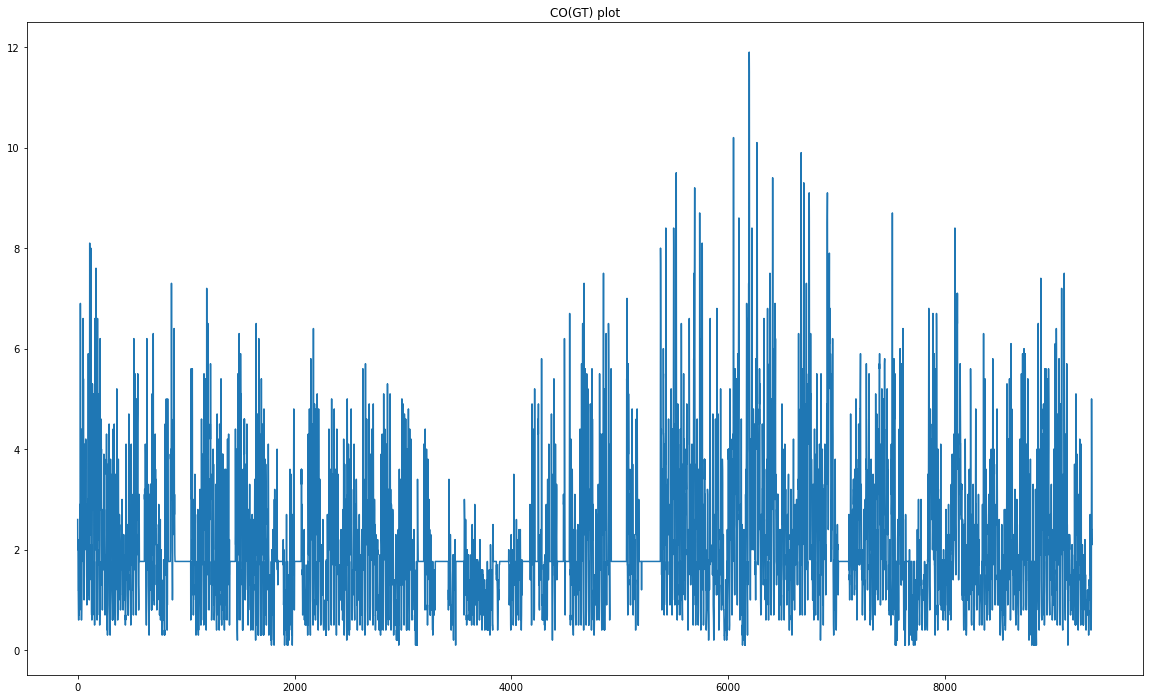

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(data['CO(GT)'])
plt.title('CO(GT) plot')

Text(0.5, 1.0, 'Temperature plot')

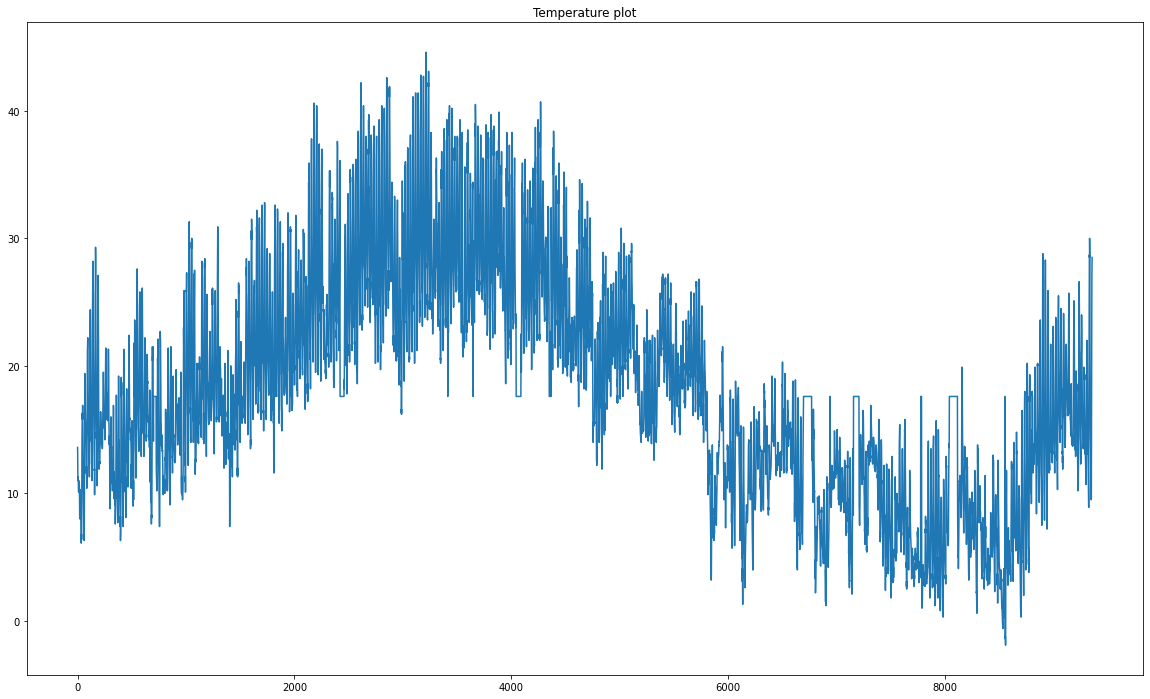

In [27]:
plt.figure(figsize=(20,12))
plt.plot(data['T'])
plt.title('Temperature plot')

In [28]:
data['datetime'] = data['Date'] + str(' ')+ data['Time']

In [29]:
data.head()

,Date,Time,CO(GT),T,day,hour,datetime
0,10/03/2004,18.00.00,2.6,13.6,10.0,18,10/03/2004 18.00.00
1,10/03/2004,19.00.00,2.0,13.3,10.0,19,10/03/2004 19.00.00
2,10/03/2004,20.00.00,2.2,11.9,10.0,20,10/03/2004 20.00.00
3,10/03/2004,21.00.00,2.2,11.0,10.0,21,10/03/2004 21.00.00
4,10/03/2004,22.00.00,1.6,11.2,10.0,22,10/03/2004 22.00.00


In [30]:
data['datetime'] = pd.to_datetime(data['datetime'].str.strip(), format='%d/%m/%Y %H.%M.%S')

In [31]:
for col in data.columns:  
    dataTypeSeries = data[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of Date column of Dataframe :
object
Data type of Time column of Dataframe :
object
Data type of CO(GT) column of Dataframe :
float64
Data type of T column of Dataframe :
float64
Data type of day column of Dataframe :
float64
Data type of hour column of Dataframe :
object
Data type of datetime column of Dataframe :
datetime64[ns]


In [32]:
data.head()

,Date,Time,CO(GT),T,day,hour,datetime
0,10/03/2004,18.00.00,2.6,13.6,10.0,18,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,13.3,10.0,19,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,11.9,10.0,20,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,11.0,10.0,21,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,11.2,10.0,22,2004-03-10 22:00:00


In [33]:
cols = ['datetime','CO(GT)','T']
data = data[cols]

In [34]:
data[data['datetime'] == '2004-03-25 00:00:00'].index.to_numpy()

array([342])

In [35]:
data = data[6:342]

In [36]:
data.tail(5)

,datetime,CO(GT),T
337,2004-03-24 19:00:00,4.5,10.7
338,2004-03-24 20:00:00,3.5,10.8
339,2004-03-24 21:00:00,2.6,10.3
340,2004-03-24 22:00:00,1.7,10.1
341,2004-03-24 23:00:00,1.3,10.4


In [37]:
data.head()

,datetime,CO(GT),T
6,2004-03-11 00:00:00,1.200000,11.3
7,2004-03-11 01:00:00,1.000000,10.7
8,2004-03-11 02:00:00,0.900000,10.7
9,2004-03-11 03:00:00,0.600000,10.3
10,2004-03-11 04:00:00,1.765545,10.1


In [38]:
!pip install darts

     |████████████████████████████████| 326 kB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 51.4 MB/s 
     |████████████████████████████████| 165 kB 37.6 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 1.4 MB 23.9 MB/s 
     |████████████████████████████████| 11.2 MB 40.7 MB/s 
     |████████████████████████████████| 792 kB 32.4 MB/s 
     |████████████████████████████████| 375 kB 42.8 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638402 sha256=b7f2e098ce0d83c89fb811d983e99679a51343eb8eb3a1c20483a859c58d1c03
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels

In [39]:
import darts
from darts import TimeSeries

In [40]:


series1 = TimeSeries.from_dataframe(data, 'datetime', 'CO(GT)')
series2 = TimeSeries.from_dataframe(data, 'datetime', 'T')

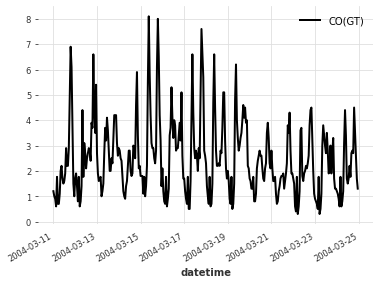

In [41]:
series1.plot()


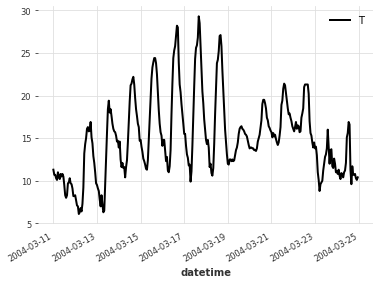

In [42]:
series2.plot()

In [43]:
training1, validation1 = series1.split_before(pd.Timestamp('18-03-2004 00:00:00'))
training2, validation2 = series2.split_before(pd.Timestamp('18-03-2004 00:00:00'))

In [44]:
len(training1)

168

In [45]:
len(validation1)

168

In [46]:
print(validation1[0])

<TimeSeries (DataArray) (datetime: 1, component: 1, sample: 1)>
array([[[2.3]]])
Coordinates:
  * datetime   (datetime) datetime64[ns] 2004-03-18
  * component  (component) object 'CO(GT)'
Dimensions without coordinates: sample


In [47]:
from darts.models import ExponentialSmoothing

In [48]:
model_ex1 = ExponentialSmoothing()


In [49]:
model_ex2 = ExponentialSmoothing()


In [50]:
from darts.metrics import mape

In [51]:
his_ex1 = model_ex1.historical_forecasts(series1,start =pd.Timestamp('2004-03-18 00:00:00'))

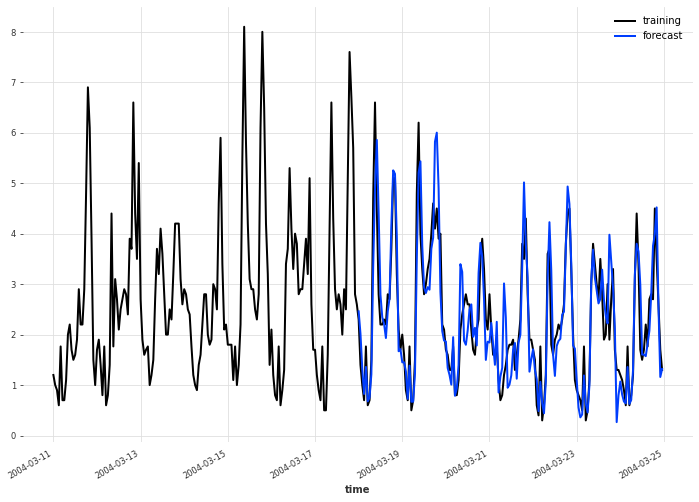

In [52]:
plt.figure(101, figsize=(12, 8))
series1.plot(label='training')
his_ex1.plot(label='forecast')
plt.legend();

In [53]:
len(his_ex1)

168

In [54]:
print(mape(his_ex1,validation1))

24.076937557860717


In [55]:
his_ex2 = model_ex2.historical_forecasts(series2,start =pd.Timestamp('2004-03-18 00:00:00'))

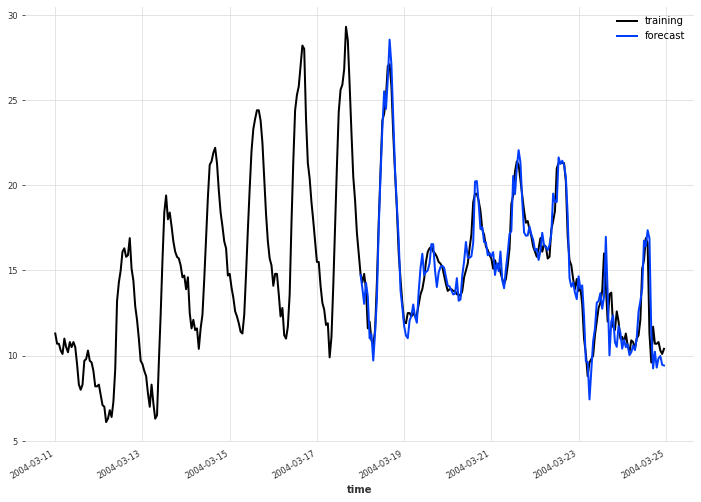

In [56]:
plt.figure(101, figsize=(12, 8))
series2.plot(label='training')
his_ex2.plot(label='forecast')
plt.legend();

In [57]:
print(mape(his_ex2,validation2))

5.559109458693462


In [58]:
from darts.models import Theta

In [59]:
model_th1 = Theta()


In [60]:
model_th2 = Theta()


In [61]:
his_th1 = model_th1.historical_forecasts(series1,start =pd.Timestamp('2004-03-18 00:00:00'))

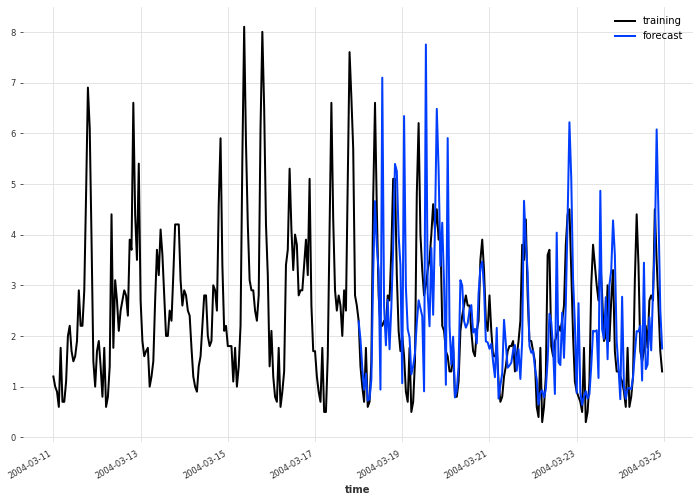

In [62]:
plt.figure(101, figsize=(12, 8))
series1.plot(label='training')
his_th1.plot(label='forecast')
plt.legend();

In [63]:
print(mape(his_th1,validation1))

39.38733425666297


In [64]:
his_th2 = model_th2.historical_forecasts(series2,start =pd.Timestamp('2004-03-18 00:00:00'))

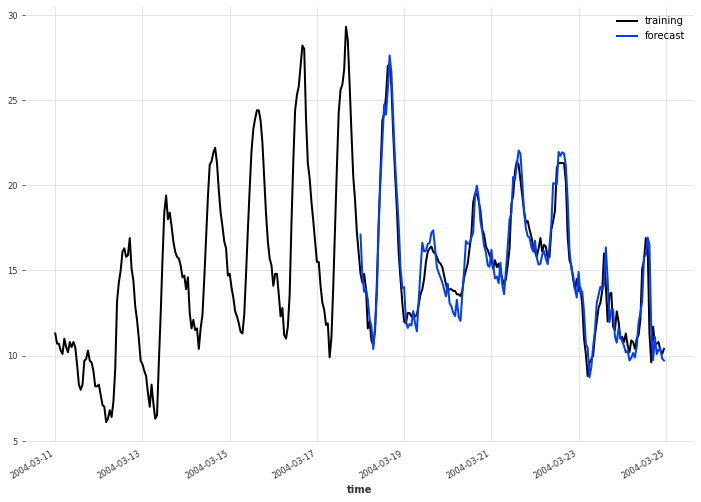

In [65]:
plt.figure(101, figsize=(12, 8))
series2.plot(label='training')
his_th2.plot(label='forecast')
plt.legend();

In [66]:
print(mape(his_th2,validation2))

5.57601703785106


In [67]:
from darts.models import FFT

model_fft1 = FFT()


In [68]:
model_fft2 = FFT()


In [69]:
his_fft1 = model_fft1.historical_forecasts(series1,start =pd.Timestamp('2004-03-18 00:00:00'))

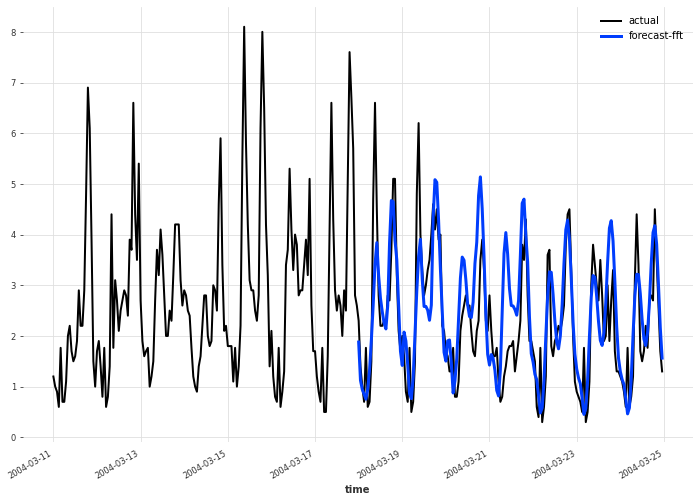

In [70]:
plt.figure(101, figsize=(12, 8))
series1.plot(label = 'actual')
his_fft1.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [71]:
print(mape(his_fft1,validation1))

33.59979260858946


In [72]:
his_fft2 = model_fft2.historical_forecasts(series2,start =pd.Timestamp('2004-03-18 00:00:00'))

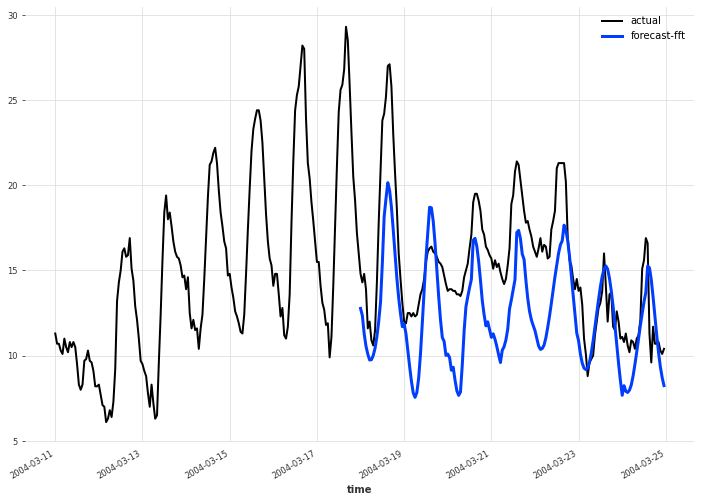

In [73]:
plt.figure(101, figsize=(12, 8))
series2.plot(label = 'actual')
his_fft2.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [74]:
print(mape(his_fft2,validation2))

26.726704023275804
